# <center> <b> Final Project
<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Content
1. Data Cleaning
2. EDA
3. Model
4. Tổng hợp kết quả

## 1. Data Preprocessing 


### Importing

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

### Formating

In [2]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 200) 

In [3]:
# Đọc dữ liệu
df = pd.read_csv('dataset.csv', header = 0, encoding='utf8')
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,rd_id,savingValueMar2021_heoSo,savingValueJuin2021_heoSo,totalLoginMar2021_heoSo,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543,1542621943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062,1570544787,NaN,NaN,NaN,NaN,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071,636921018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642516181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575,1308443119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def columns_info (df):
    columns = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    for colm in df.columns:
        columns.append(colm)
        dtypes.append (df[colm].dtypes)
        unique.append (df[colm].unique())
        nunique.append (df[colm].nunique())
        nulls.append (df[colm].isna().sum())
    return pd.DataFrame({'Columns' :columns ,
                         'Data types' :dtypes ,
                         'Unique values' :unique ,
                         'Number of unique' :nunique ,
                         'Missing values' :nulls})

In [5]:
columns_info(df)

,Columns,Data types,Unique values,Number of unique,Missing values
0,local_ref_1,object,"[MALE, FEMALE, nan]",2,2734
1,vn_marital_status,object,"[Married, Single, nan, Other, Partner, Seperat...",7,3029
2,resid_province,float64,"[27.0, 79.0, 1.0, 40.0, 49.0, 37.0, 38.0, 64.0...",64,6569
3,resid_district,float64,"[262.0, 769.0, 250.0, 431.0, 512.0, 377.0, 6.0...",704,6565
4,resid_wards,float64,"[9436.0, 27097.0, 8989.0, 18055.0, 20758.0, 14...",8782,6567
5,birth_incorp_date,float64,"[1992.0, 1986.0, 1980.0, 2001.0, 1989.0, 1993....",86,10
6,amount_week,float64,"[nan, 0.0, 0.01, 0.04, 0.02, 0.05, 0.19, 0.16,...",20,45200
7,max_amount_week,float64,"[nan, 0.000114286, 0.00047551, 1.43e-05, 0.000...",6044,45200
8,min_amount_week,float64,"[nan, 0.000635841, 1.14e-05, 7.95e-05, 0.00113...",3284,45200
9,distinct_payment_code_week,float64,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0]",6,43150


In [6]:
df = df.rename(columns={' amount_week ': 'amount_week'})
df = df.rename(columns={' total_amt_mar2021 ': 'total_amt_mar2021'})
df = df.drop(columns=['resid_province','resid_district','resid_wards', 'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021', 'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo', 'balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021', 'most_act_mar2021_count', 'most_act_mar2021'])
df.head()

,local_ref_1,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,nhomno_xhtdJuin2021
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.000056,0.000204,0.000008,0.0,0.0,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,NaN
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000019,0.000140,0.000203,0.0,0.0,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,1.0
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,0.000122,0.000143,0.0,0.0,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,NaN
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,NaN
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,0.000097,0.000247,0.000001,1.0,5.0,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,NaN


In [7]:
# Loại bỏ các giá trị NaN 
df = df.dropna(subset = ['nhomno_xhtdJuin2021'])
# Tạo một cột mới là cột 'age', tính tuổi dựa trên năm 2024 trừ đi giá trị trong cột 'birth_incorp_date'
# Sau đó loại bỏ cột 'birth_incorp_date'
df['age'] = 2024 - df.birth_incorp_date
df.drop('birth_incorp_date', inplace = True, axis = 1)
# loại bỏ khoảng trắng thừa ở đầu và cuối tên cột và thay đổi 1 số tên cột
df.rename(columns = lambda x: x.strip(), inplace = True)
df.rename(columns = {'local_ref_1': 'gender', 'vn_marital_status': 'marital_status'}, inplace = True)

### Reduce Outliers

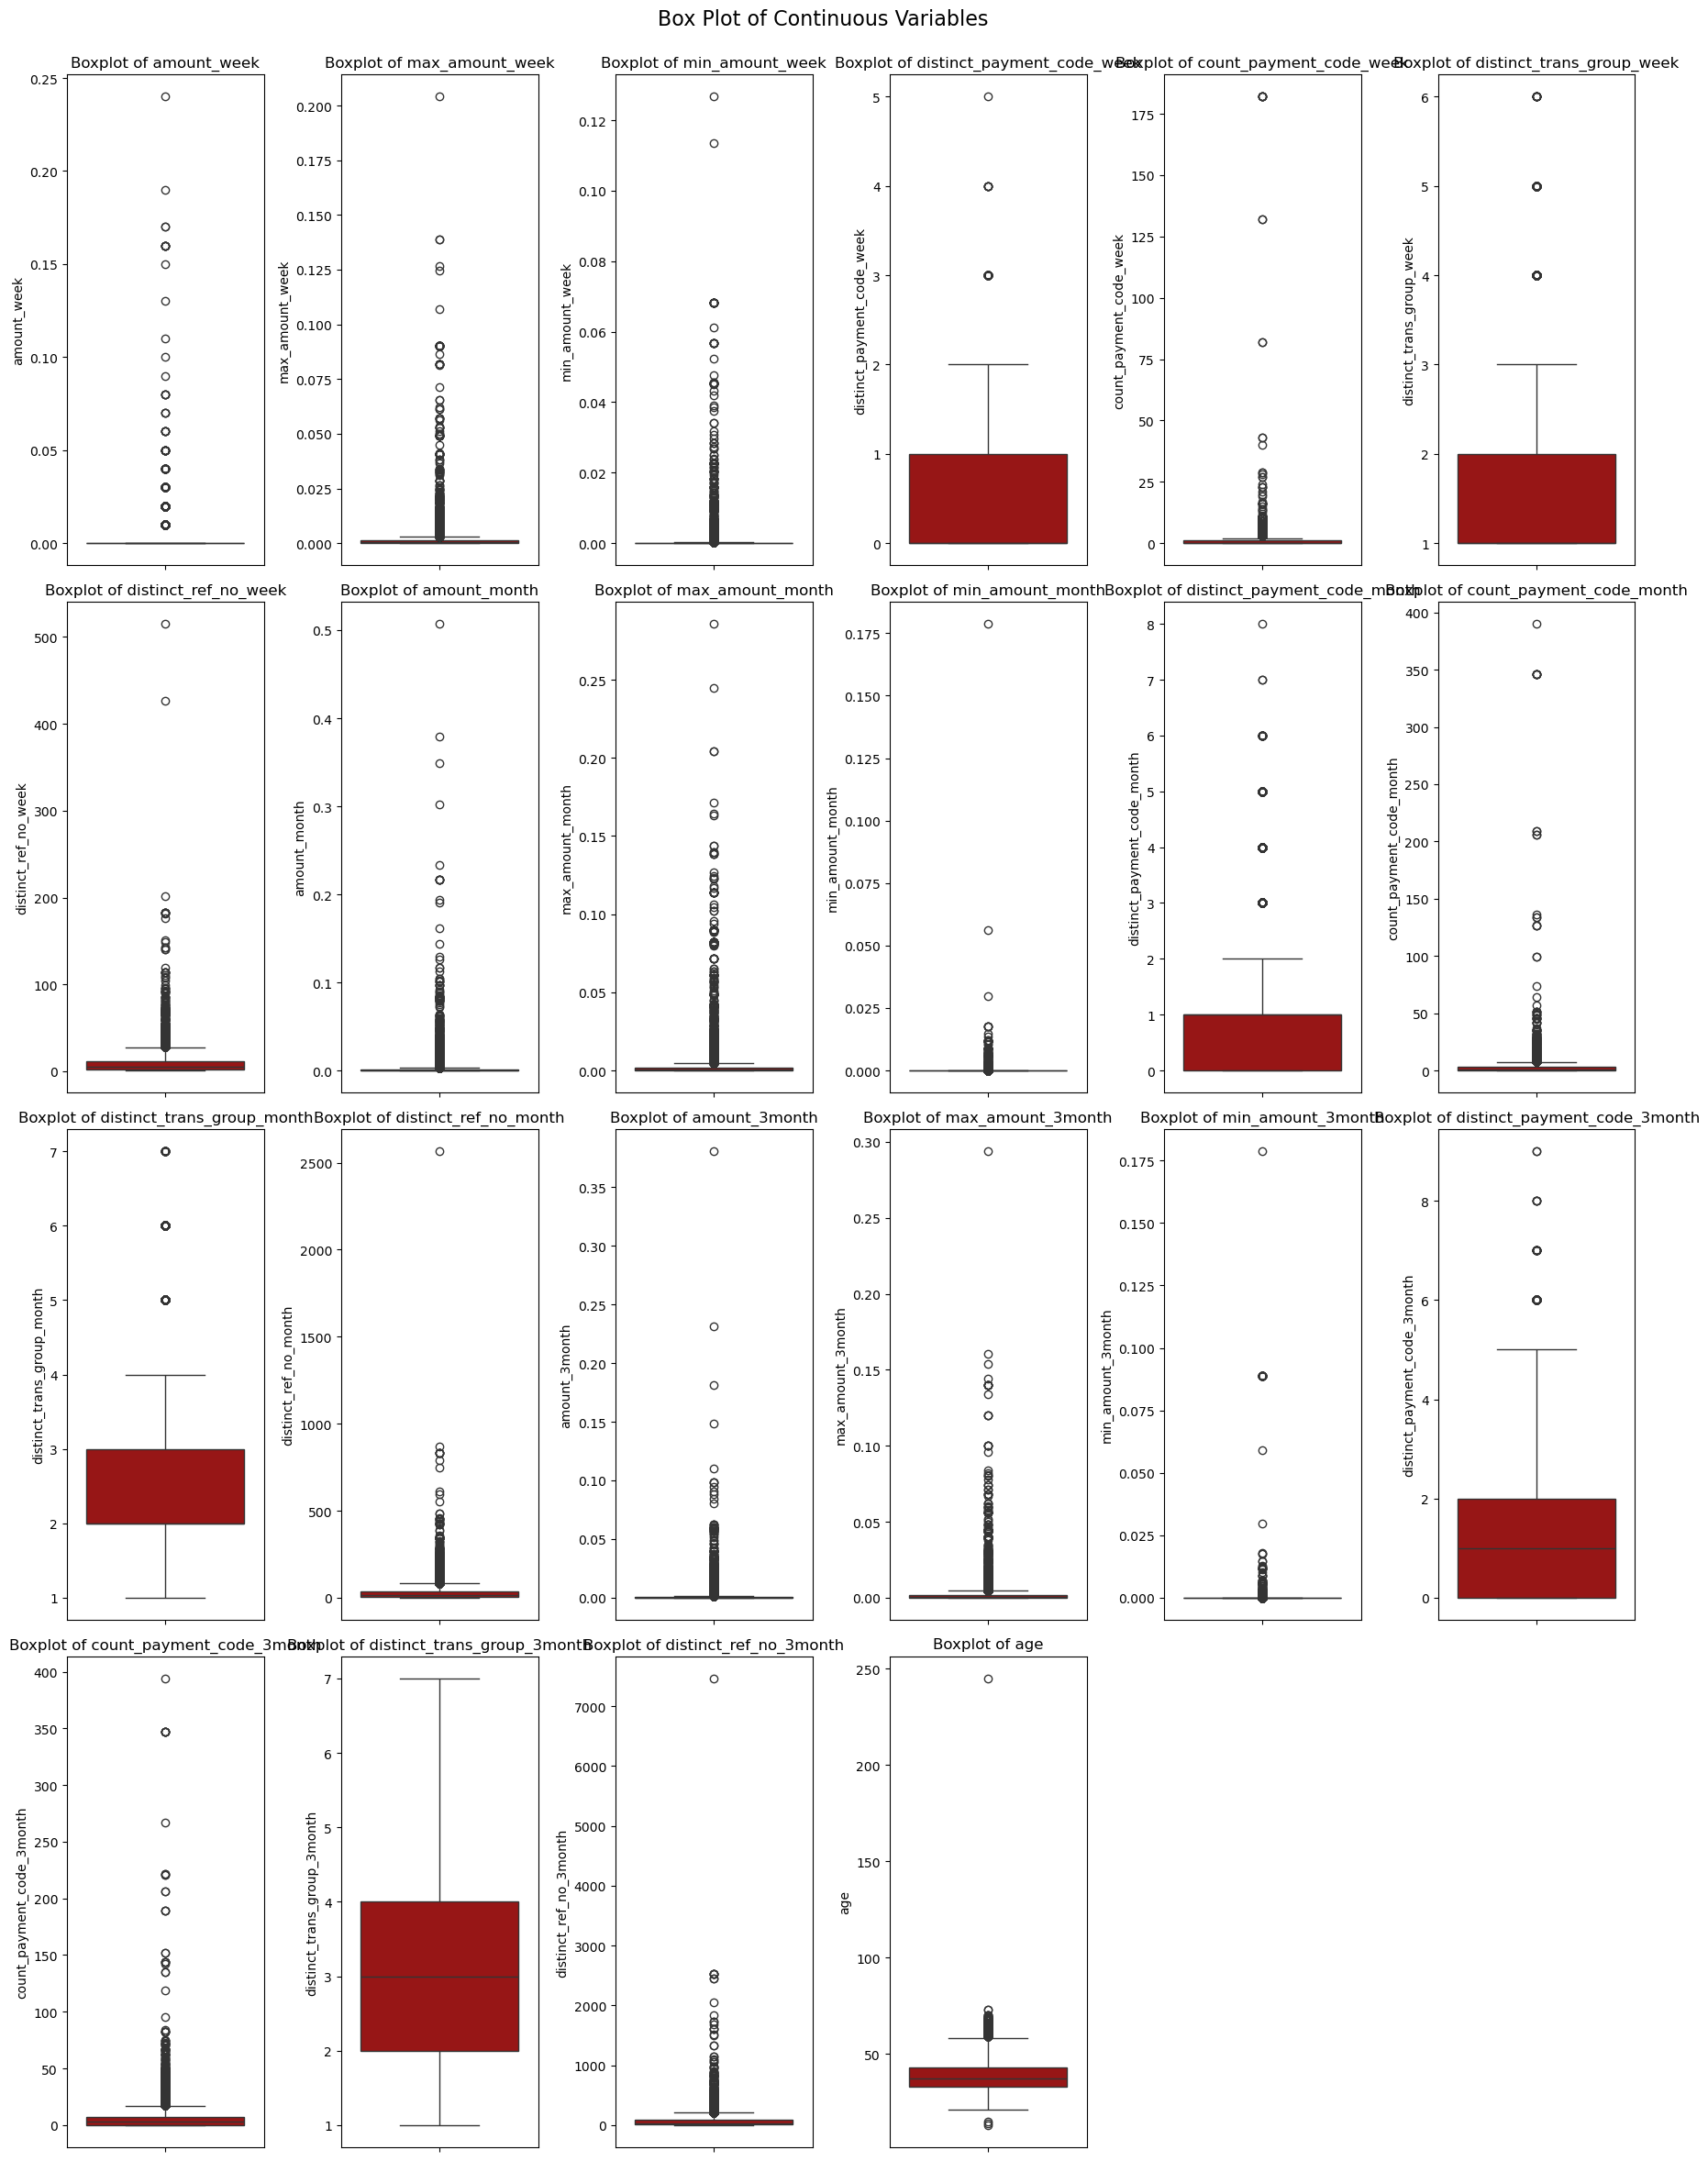

In [8]:
# Lọc ra các cột số
numerical = df.select_dtypes(include=['float64', 'int64']).columns
numerical = numerical[numerical != 'nhomno_xhtdJuin2021']
# Tính số lượng hàng và cột cho các subplot
n_columns = 6  # Số cột cố định là 6
n_rows = (len(numerical) // n_columns) + (1 if len(numerical) % n_columns > 0 else 0)

# Tạo figure với kích thước phù hợp
plt.figure(figsize=(18, n_rows * 6))

# Tạo subplot với số lượng hàng và cột linh động
for i, col in enumerate(numerical):
    ax = plt.subplot(n_rows, n_columns, i + 1)
    sns.boxplot(data=df, y=col, ax=ax, color='#AC0000')
    ax.set_title(f'Boxplot of {col}')

# Thêm tiêu đề chung
plt.suptitle('Box Plot of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()


In [9]:
for col in numerical:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Khoảng cách IQR
    lower_bound = Q1 - 1.5 * IQR  # Giới hạn dưới
    upper_bound = Q3 + 1.5 * IQR  # Giới hạn trên

    # Tìm các outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


In [10]:
# Thay thế outliers bằng cận trên hoặc cận dưới
for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế giá trị nhỏ hơn lower_bound bằng lower_bound
    # Thay thế giá trị lớn hơn upper_bound bằng upper_bound
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


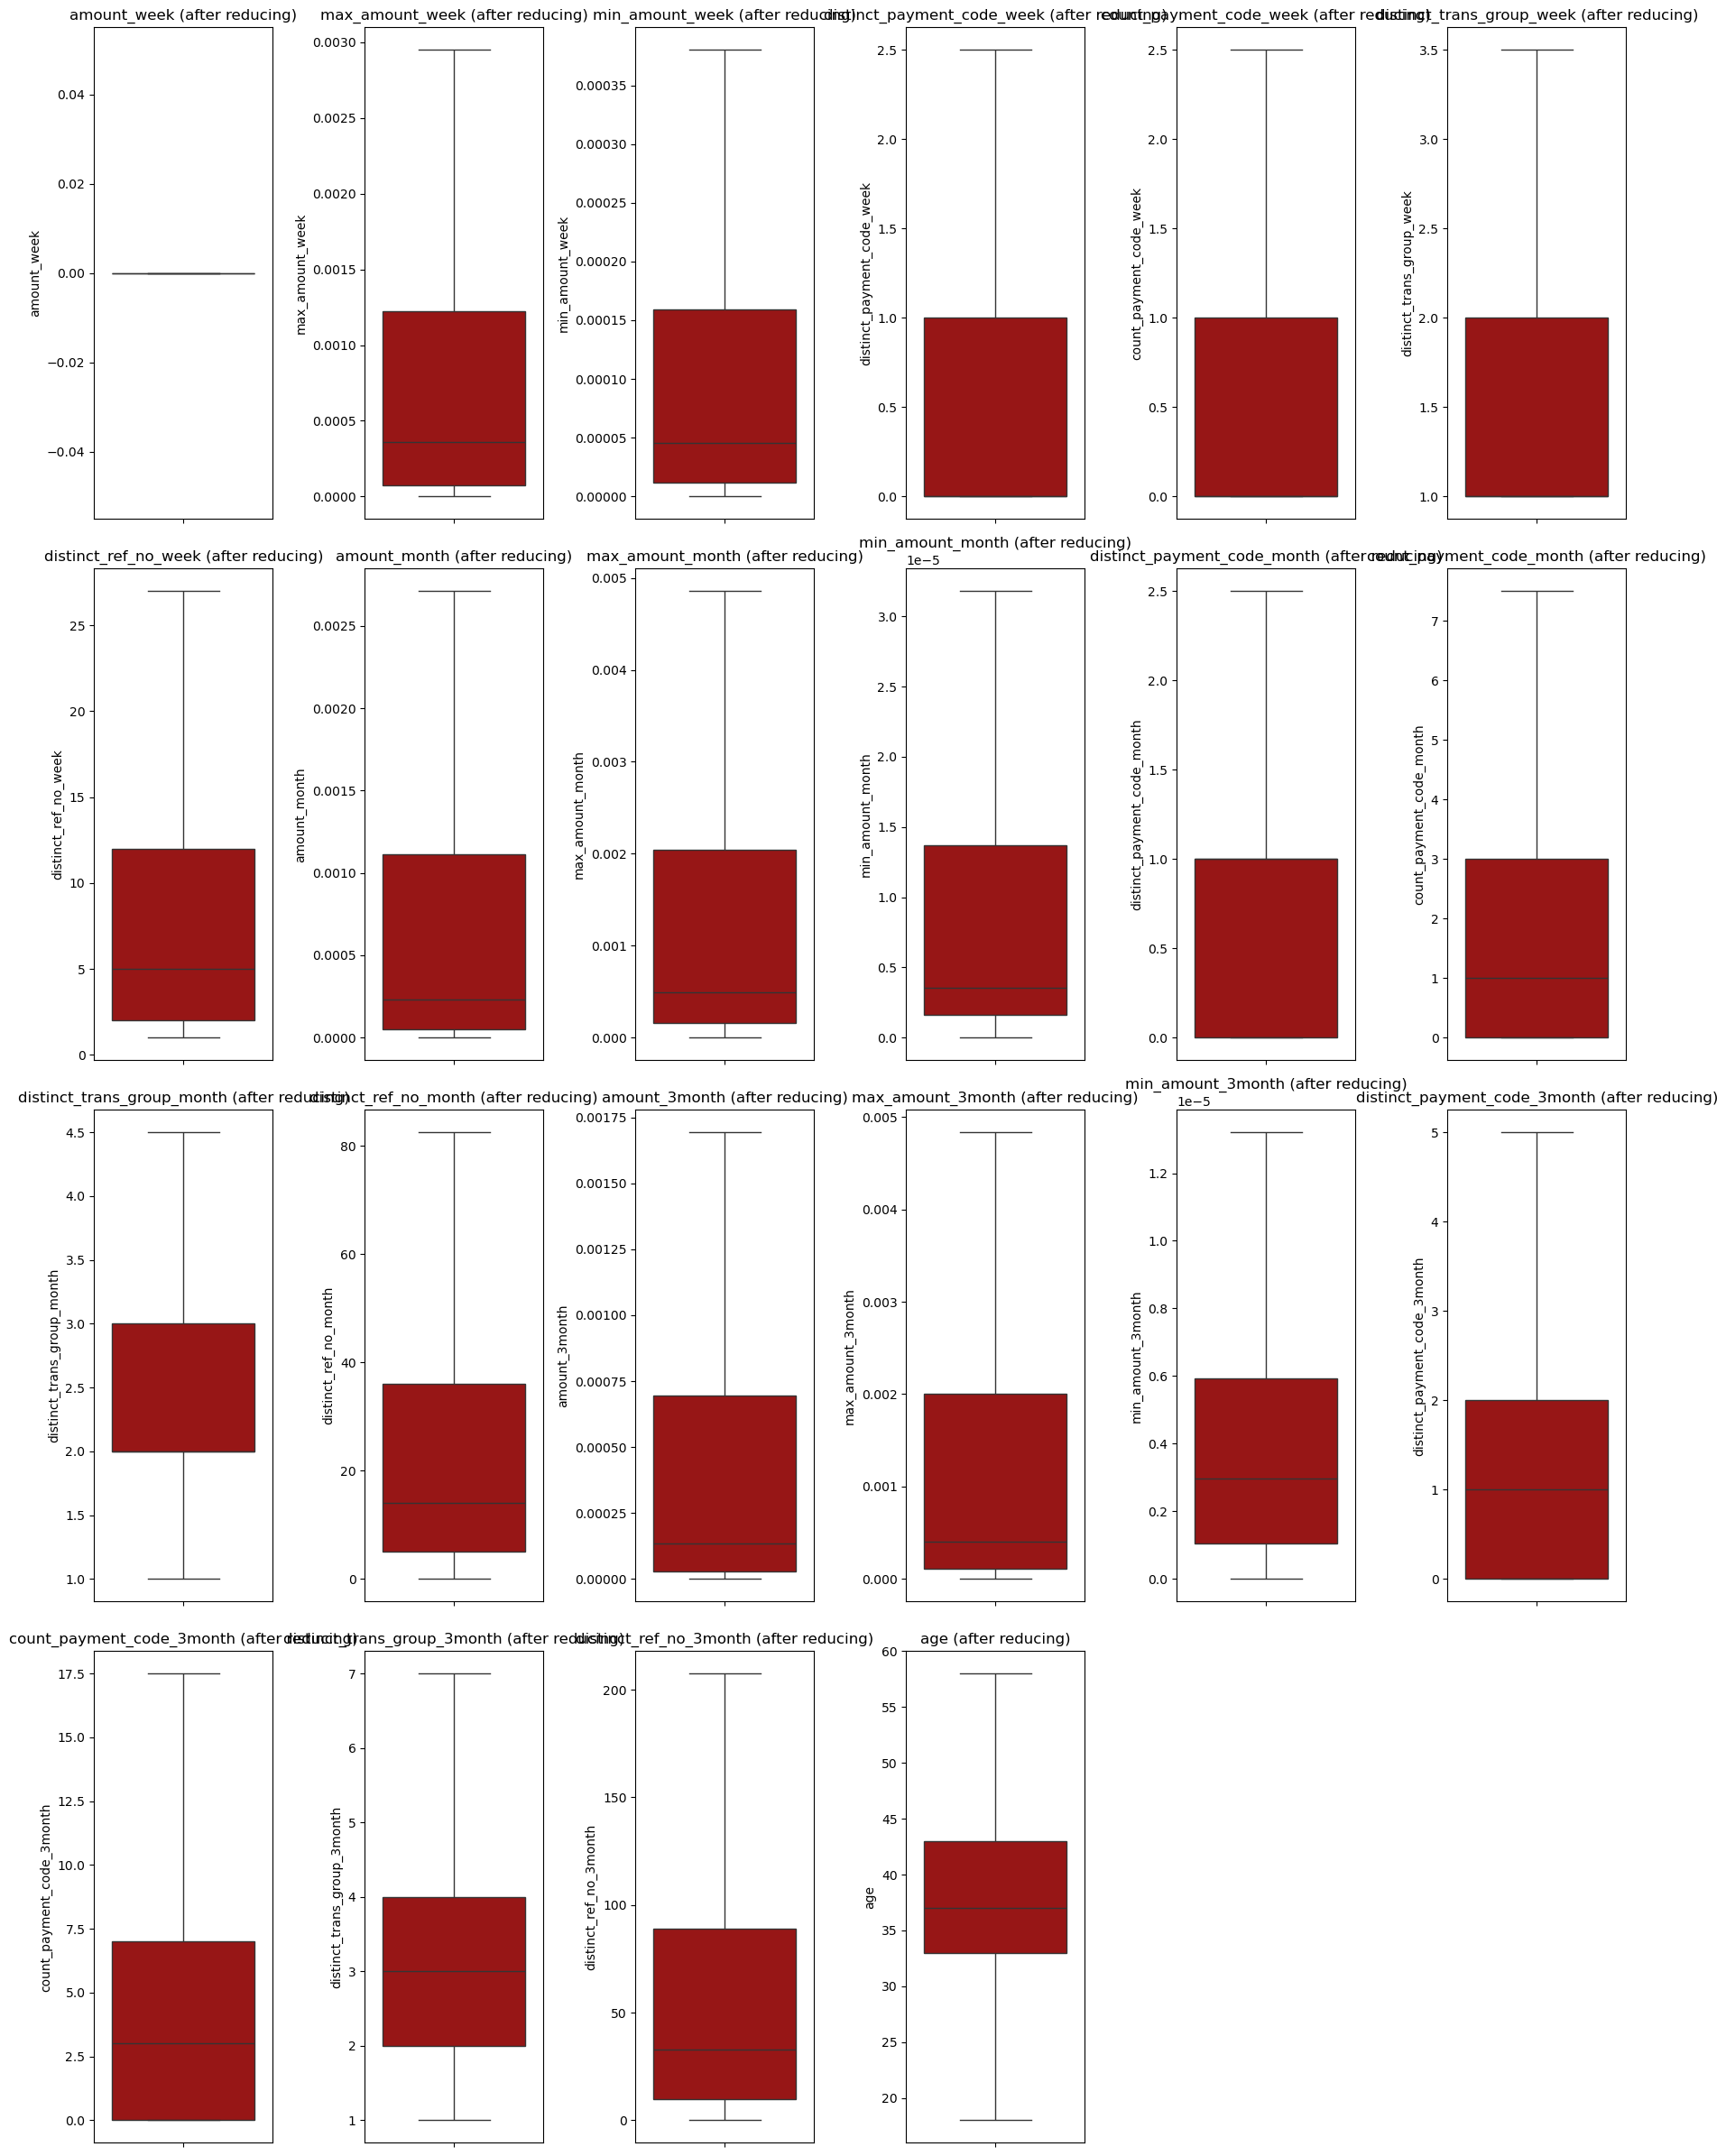

In [11]:
n_columns = 6  # Số cột cố định là 6
n_rows = (len(numerical) // n_columns) + (1 if len(numerical) % n_columns > 0 else 0)

# Vẽ lại boxplot cho các cột số sau khi giảm outliers
plt.figure(figsize=(18, n_rows * 6))  # Điều chỉnh chiều cao của figure tùy thuộc vào số hàng

# Vẽ boxplot cho từng cột số
for i, col in enumerate(numerical):
    plt.subplot(n_rows, n_columns, i + 1)  # Tạo một lưới subplot linh động
    sns.boxplot(data=df, y=col, color='#AC0000')
    plt.title(f'{col} (after reducing)')
plt.tight_layout()
plt.show()

### Missing values

In [12]:
# Thay thế giá trị thiếu trong các cột numerical bằng mean
df[numerical] = df[numerical].fillna(df[numerical].mean())

In [13]:
df["nhomno_recat"] = np.where((df["nhomno_xhtdJuin2021"] < 2), "Credible", "Incredible")
df["marital_status_recat"] = np.where((df["marital_status"] == "Married") | (df["marital_status"] == "Partner"), 
                                     "In a relationship", 
                                     np.where(pd.isna(df["marital_status"]), 
                                              None, "Single"))
categorical = ['marital_status_recat', 'gender','nhomno_recat']
df.dropna(inplace=True)
# Thay thế giá trị thiếu trong các cột categorical bằng mode
for col in categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

## 2. EDA

### 2.1. Phân tích các yếu tố nhân khẩu học

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (20, 20))
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}\n({p:.2f}%)'.format(v = val, p = pct)
    return autopct
    

#### Tỷ lệ nam, nữ giới trong các nhóm nợ

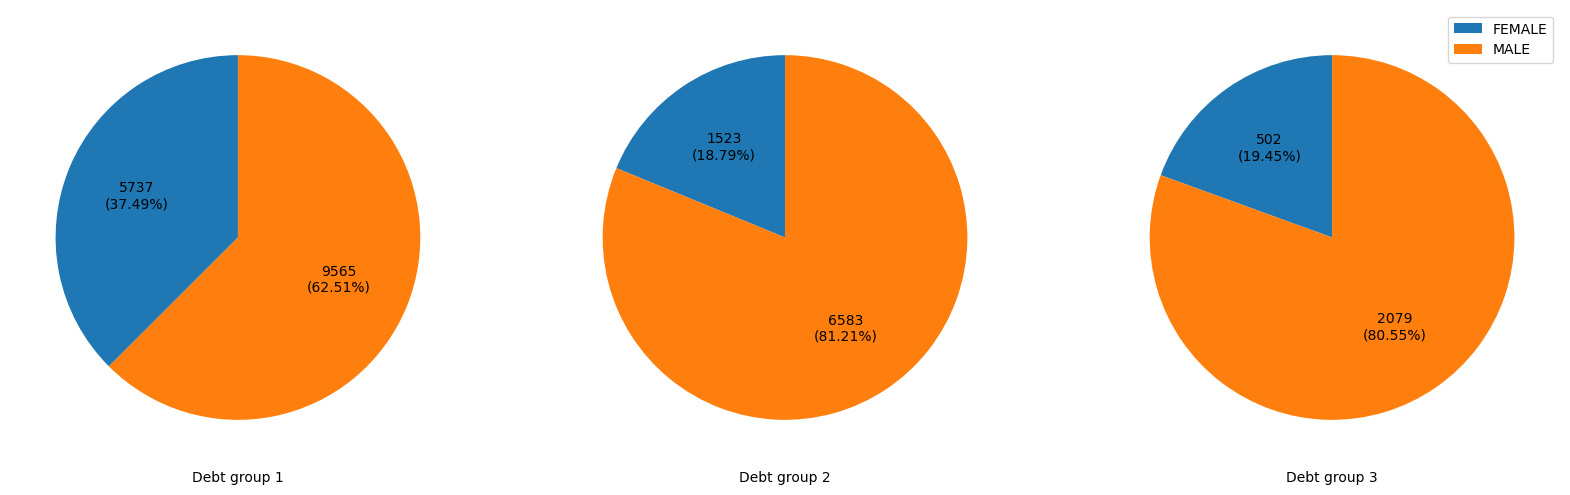

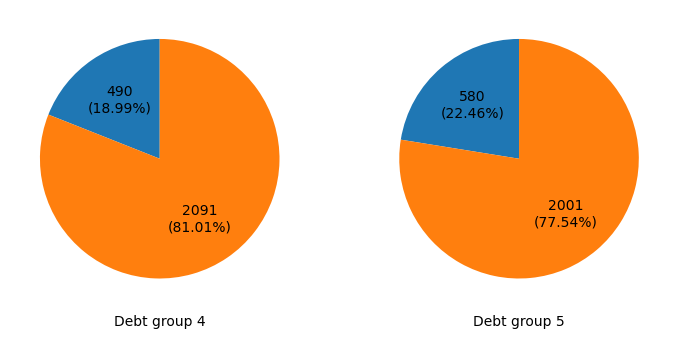

In [15]:
for i in range(2):
    values = df[df['nhomno_xhtdJuin2021'] == i+1].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
    df[df['nhomno_xhtdJuin2021'] == i+1].groupby(['gender']).count().plot(kind = 'pie', 
                                                                          y = 'nhomno_xhtdJuin2021', 
                                                                          labels = None, 
                                                                          legend = None, 
                                                                          ylabel = '',
                                                                          autopct = make_autopct(values),
                                                                          ax = ax[i], 
                                                                          startangle = 90)
    ax[i].set_xlabel('Debt group {}'.format(i+1))

values = df[df['nhomno_xhtdJuin2021'] == 3].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['nhomno_xhtdJuin2021'] == 3].groupby(['gender']).count().plot(kind = 'pie', 
                                                                    y = 'nhomno_xhtdJuin2021', 
                                                                    labels = None, 
                                                                    ylabel = '', 
                                                                    autopct = make_autopct(values),
                                                                    ax = ax[2], 
                                                                    startangle = 90)
ax[2].set_xlabel('Debt group 3')
    
fig, ax = plt.subplots(1, 2, figsize = (8.5, 8.55))
for i in range(2):
    values = df[df['nhomno_xhtdJuin2021'] == 3].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
    df[df['nhomno_xhtdJuin2021'] == i+4].groupby(['gender']).count().plot(kind = 'pie', 
                                                                          y = 'nhomno_xhtdJuin2021', 
                                                                          labels = None, 
                                                                          ylabel = '',
                                                                          legend = None,
                                                                          autopct = make_autopct(values), 
                                                                          ax = ax[i], 
                                                                          startangle = 90)
    ax[i].set_xlabel('Debt group {}'.format(i+4))

plt.show()

- Trong tất cả các nhóm nợ, nam giới đều chiếm đa số

#### Lượng khách hàng đáng tin cậy và không đáng tin cậy theo giới tính

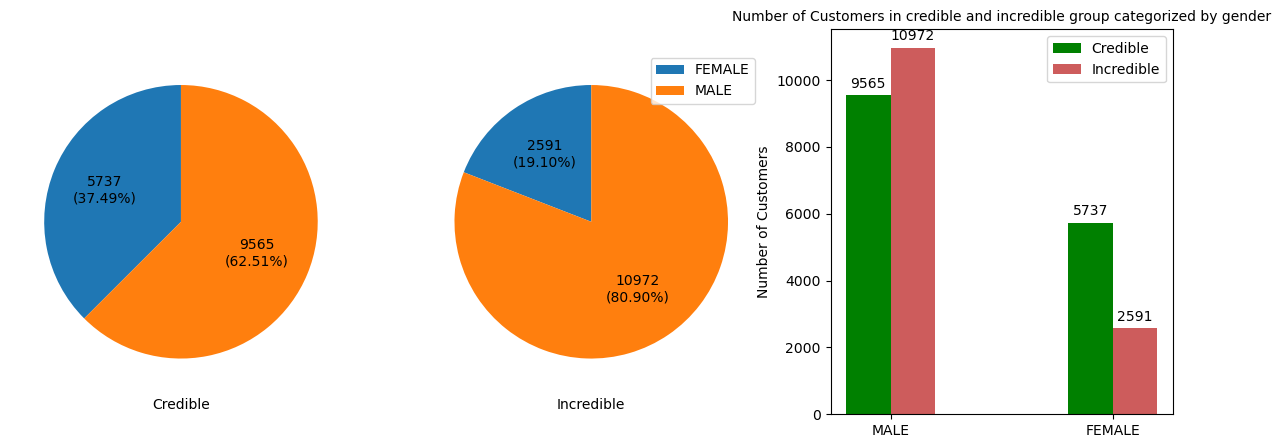

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
values = df[df['nhomno_xhtdJuin2021'] < 2].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['nhomno_xhtdJuin2021'] < 2].groupby(['gender']).count().plot(kind = 'pie', 
                                                                      y = 'nhomno_xhtdJuin2021', 
                                                                      labels = None, 
                                                                      legend = None, 
                                                                      ylabel = '',
                                                                      autopct = make_autopct(values),
                                                                      ax = ax[0], 
                                                                      startangle = 90)
ax[0].set_xlabel('Credible')

values = df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['gender']).count().plot(kind = 'pie', 
                                                                    y = 'nhomno_xhtdJuin2021', 
                                                                    labels = None, 
                                                                    ylabel = '', 
                                                                    autopct = make_autopct(values),
                                                                    ax = ax[1], 
                                                                    startangle = 90)
ax[1].set_xlabel('Incredible')

x = np.arange(len(list(df["gender"].unique())[:2]))
width = 0.2
smaller = df[df['nhomno_xhtdJuin2021'] < 2].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()
larger = df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['gender']).count()['nhomno_xhtdJuin2021'].to_list()

y_credible = smaller[::-1]
y_incredible = larger[::-1]

rects1 = ax[2].bar(x - width/2, y_credible, width, label = 'Credible', color = 'g')
rects2 = ax[2].bar(x + width/2, y_incredible, width, label = 'Incredible', color = 'indianred')

ax[2].set_ylabel('Number of Customers', fontsize = 10)
ax[2].set_title('Number of Customers in credible and incredible group categorized by gender', fontsize = 10)

plt.xticks(x, list(df["gender"].unique())[:2], fontsize = 10)
plt.yticks(fontsize = 10)
ax[2].legend(fontsize = 10)

ax[2].bar_label(rects1, padding = 3, fontsize = 10)
ax[2].bar_label(rects2, padding = 3, fontsize = 10)

plt.show()

- Biểu đồ tròn:

Trong nhóm không đáng tin cậy: Ngược lại, nam giới chiếm tỷ lệ cao hơn (80.90%) trong nhóm khách hàng không đáng tin cậy so với phụ nữ (19.10%). Điều này cho thấy nam giới có tỷ lệ nợ xấu hoặc vi phạm hợp đồng cao hơn.

- Biểu đồ cột:

Tỷ lệ khách hàng nữ đáng tin cậy nhiều hơn so với khách hàng nam đáng tin cậy. Ở khách hàng nam, số khách hàng không đáng tin cậy cao hơn lượng khách hàng đáng tin cậy, ở khách hàng nữ thì lượng khách không đáng tin chỉ bằng khoảng một nửa so với lượng khách đáng tin cậy

Số lượng khách hàng nam không đáng tin cậy vượt trội so với khách hàng nữ không đáng tin cậy. Điều này cũng phù hợp với kết quả từ biểu đồ tròn.

- Nhận xét chung
Từ các biểu đồ trên, ta rút ra được một số nhận xét sau:

Sự khác biệt giới tính: Có sự khác biệt rõ rệt về tỷ lệ khách hàng đáng tin cậy và không đáng tin cậy giữa nam và nữ. Phụ nữ có xu hướng được đánh giá cao hơn về độ tin cậy trong việc thanh toán.

#### Tỷ lệ tín nhiệm giữa người độc thân và đã kết hôn

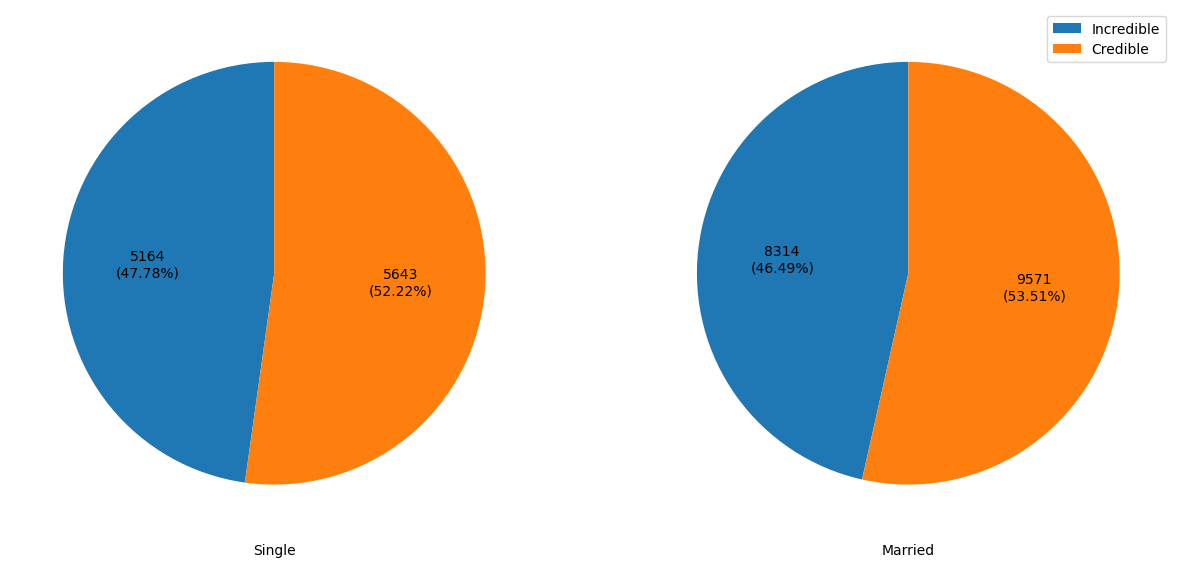

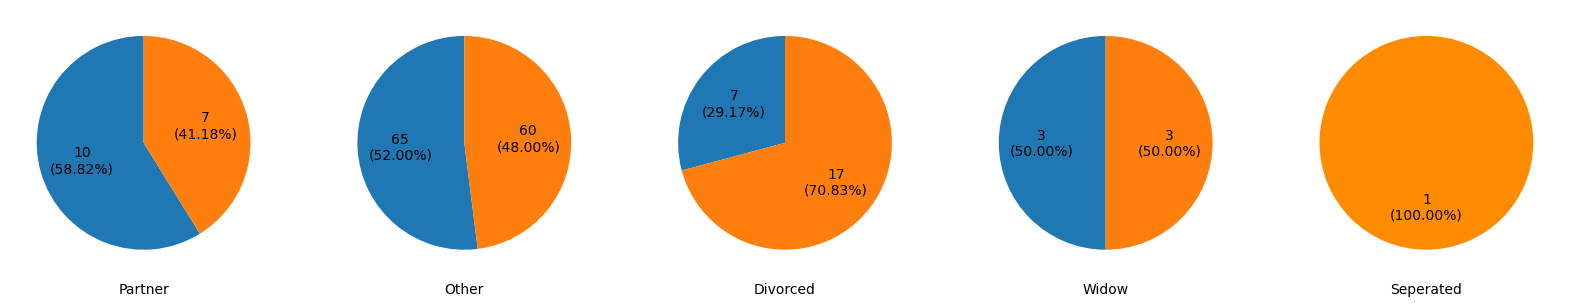

In [17]:
L0 = df.marital_status.unique().tolist()
L = [e for e in L0 if e not in ('Single', 'Married', np.nan)]
L.remove('Seperated')
L.append('Seperated')

fig, ax = plt.subplots(1, 2, figsize = (15, 15))
    
for i in range(1):
    values = df[df['marital_status'] == L0[i]].groupby(['nhomno_recat']).count()['nhomno_xhtdJuin2021'].to_list()
    df[df['marital_status'] == L0[i]].groupby(['nhomno_recat']).count()[::-1].plot(kind = 'pie', 
                                                                          y = 'nhomno_xhtdJuin2021', 
                                                                          labels = None, 
                                                                          legend = None, 
                                                                          ylabel = '',
                                                                          autopct = make_autopct(values),
                                                                          ax = ax[i], 
                                                                          startangle = 90)
    ax[i].set_xlabel('{}'.format(L0[i]))

for i in range(1,2):
    values = df[df['marital_status'] == L0[i]].groupby(['nhomno_recat']).count()['nhomno_xhtdJuin2021'].to_list()
    df[df['marital_status'] == L0[i]].groupby(['nhomno_recat']).count()[::-1].plot(kind = 'pie', 
                                                                      y = 'nhomno_xhtdJuin2021', 
                                                                      labels = None,  
                                                                      ylabel = '',
                                                                      autopct = make_autopct(values),
                                                                      ax = ax[i], 
                                                                      startangle = 90)
    ax[i].set_xlabel('{}'.format(L0[i]))


fig, ax = plt.subplots(1, 5, figsize = (20, 20))
for i in range(4):
    values = df[df['marital_status'] == L[i]].groupby(['nhomno_recat']).count()['nhomno_xhtdJuin2021'].to_list()
    df[df['marital_status'] == L[i]].groupby(['nhomno_recat']).count()[::-1].plot(kind = 'pie', 
                                                                          y = 'nhomno_xhtdJuin2021', 
                                                                          labels = None, 
                                                                          legend = None, 
                                                                          ylabel = '',
                                                                          autopct = make_autopct(values),
                                                                          ax = ax[i], 
                                                                          startangle = 90)
    ax[i].set_xlabel('{}'.format(L[i]))

labels = ['Credible', 'Incredible']
wedge_color = {'Credible': 'darkorange', 
               'Incredible': 'steelblue'}
values = df[df['marital_status'] == L[4]].groupby(['nhomno_recat']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['marital_status'] == L[4]].groupby(['nhomno_recat']).count().plot(kind = 'pie', 
                                                                      y = 'nhomno_xhtdJuin2021', 
                                                                      labels = None, 
                                                                      legend = None, 
                                                                      ylabel = '',
                                                                              colors = [wedge_color[k] for k in labels],
                                                                      autopct = make_autopct(values),
                                                                      ax = ax[4], 
                                                                      startangle = 90)
ax[4].set_xlabel('{}'.format(L[4]))
plt.show()

- Nhóm độc thân: </br>
    Tỷ lệ người được đánh giá là không đáng tin cậy (Incredible) chiếm 47.78%.</br>
    Tỷ lệ người được đánh giá là đáng tin cậy (Credible) chiếm 52.22%.</br>
- Nhóm đã kết hôn:</br>
Tỷ lệ người được đánh giá là không đáng tin cậy (Incredible) chiếm 46.49%.</br>
Tỷ lệ người được đánh giá là đáng tin cậy (Credible) chiếm 53.51%.</br>
- So sánh giữa hai nhóm</br>
Nhìn chung, cả hai nhóm độc thân và đã kết hôn đều có tỷ lệ người được đánh giá là đáng tin cậy cao hơn so với người không đáng tin cậy. </br>
Tuy nhiên, có một sự khác biệt nhỏ giữa hai nhóm:
Nhóm đã kết hôn có tỷ lệ người được đánh giá là đáng tin cậy cao hơn một chút so với nhóm độc thân (53.51% so với 52.22%).</br>
Ngược lại, nhóm độc thân có tỷ lệ người không đáng tin cậy cao hơn một chút so với nhóm đã kết hôn (47.78% so với 46.49%).</br>
- Nhận xét chung:</br>
Kết hôn có thể ảnh hưởng đến mức độ tin cậy: Dựa trên dữ liệu, có thể suy đoán rằng người đã kết hôn có xu hướng được đánh giá là đáng tin cậy hơn so với người độc thân. 

#### Lượng khách hàng theo tình trạng hôn nhân và nhóm nợ

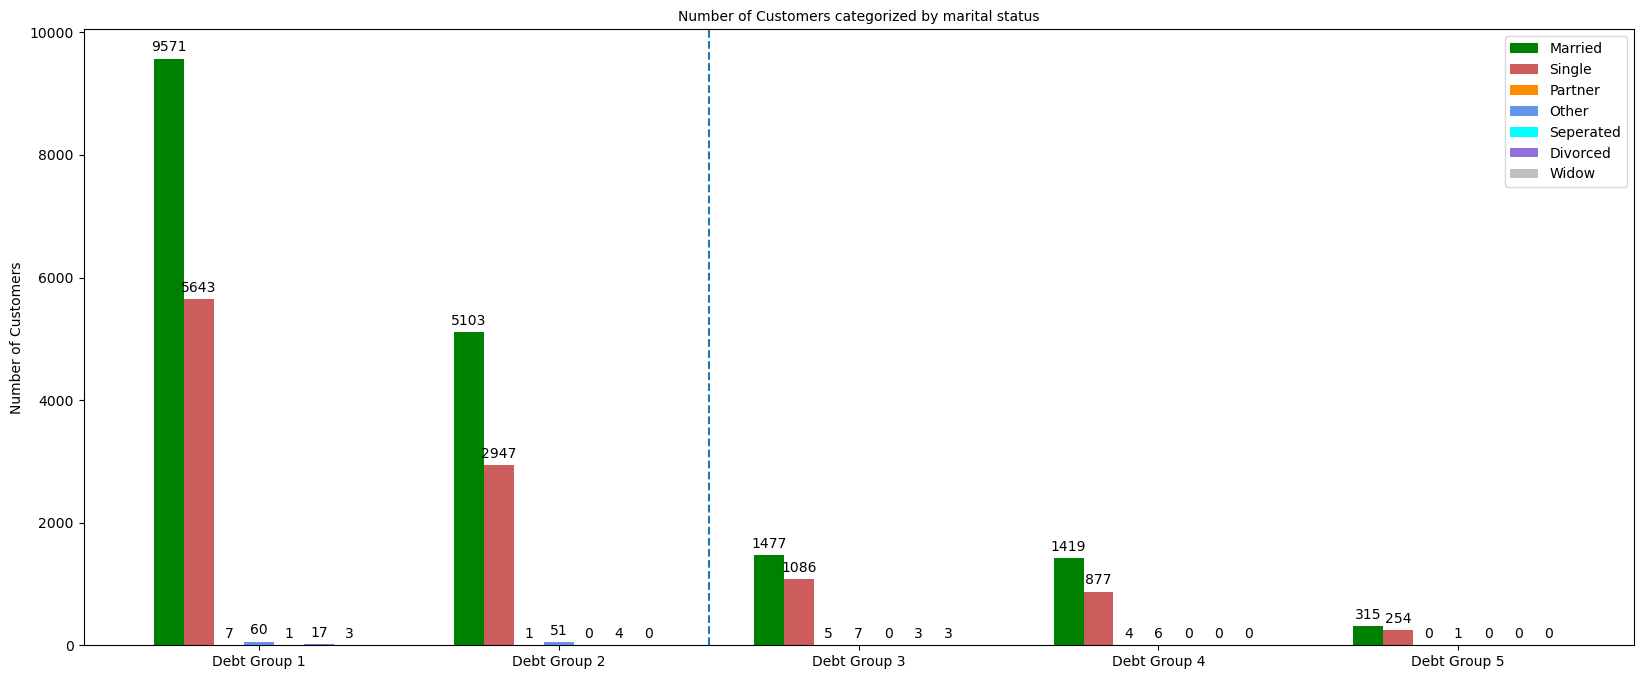

In [18]:
fig, ax = plt.subplots(figsize = (20, 8))
labels = ['Single', 'Married', 'Partner', 'Other', 'Seperated','Divorced', 'Widow']
wedge_color = {'Single': 'sienna', 
               'Married': 'darkorange', 
               'Partner': 'firebrick', 
               'Other': 'greenyellow', 
               'Seperated': 'mediumpurple', 
               'Divorced': 'cornflowerblue', 
               'Widow': 'lightcoral'}
x = np.arange(len(list(df["nhomno_xhtdJuin2021"].unique())))
width = 0.2

import collections
dg = [1.0, 2.0, 3.0, 4.0, 5.0]
dg_name = []
for i in range(1, 6):
    dg_name.append('Debt Group {}'.format(i))

ms = ['Married', 'Single', 'Partner', 'Other', 'Seperated','Divorced', 'Widow']
for k in ms:
    globals()['db_%s_dict' % (k)] = df[df['marital_status'] == k].groupby(['nhomno_xhtdJuin2021']).count()['marital_status'].to_dict()
    for i in dg:
        if i in list(globals()['db_%s_dict' % (k)].keys()):
            pass
        else:
            globals()['db_%s_dict' % (k)][i] = 0
    globals()['%s_dg' % (k)] = list(dict(collections.OrderedDict(sorted(globals()['db_%s_dict' % (k)].items()))).values())

rects1 = ax.bar(x - 1.5 * width, globals()['%s_dg' % (ms[0])], width/2, label = ms[0], color = 'g')
rects2 = ax.bar(x - 1 * width, globals()['%s_dg' % (ms[1])], width/2, label = ms[1], color = 'indianred')
rects3 = ax.bar(x - 0.5 * width, globals()['%s_dg' % (ms[2])], width/2, label = ms[2], color = 'darkorange')
rects4 = ax.bar(x, globals()['%s_dg' % (ms[3])], width/2, label = ms[3], color = 'cornflowerblue')
rects5 = ax.bar(x + 0.5 * width, globals()['%s_dg' % (ms[4])], width/2, label = ms[4], color = 'aqua')
rects6 = ax.bar(x + 1 * width, globals()['%s_dg' % (ms[5])], width/2, label = ms[5], color = 'mediumpurple')
rects7 = ax.bar(x + 1.5 * width, globals()['%s_dg' % (ms[6])], width/2, label = ms[6], color = 'silver')

ax.set_ylabel('Number of Customers', fontsize = 10)
ax.set_title('Number of Customers categorized by marital status', fontsize = 10)

plt.xticks(x, dg_name, fontsize = 10)
plt.yticks(fontsize = 10)
ax.legend(fontsize = 10)

ax.bar_label(rects1, padding = 3, fontsize = 10)
ax.bar_label(rects2, padding = 3, fontsize = 10)
ax.bar_label(rects3, padding = 3, fontsize = 10)
ax.bar_label(rects4, padding = 3, fontsize = 10)
ax.bar_label(rects5, padding = 3, fontsize = 10)
ax.bar_label(rects6, padding = 3, fontsize = 10)
ax.bar_label(rects7, padding = 3, fontsize = 10)

ax.axvline(x = 1.5, linestyle = '--')

plt.show()

- Nhận xét chung: </br>
Khách hàng đã kết hôn chiếm tỷ lệ lớn nhất trong tất cả các nhóm nợ, điều này cho thấy người đã kết hôn có xu hướng tham gia vào các hoạt động tín dụng nhiều hơn.</br>
Nhóm nợ 2 có số lượng khách hàng ít nhất so với các nhóm nợ còn lại, bất kể tình trạng hôn nhân. Điều này có thể do nhiều yếu tố như: sản phẩm tín dụng của nhóm nợ 2 ít hấp dẫn, điều kiện tiếp cận khó khăn hơn hoặc nhóm khách hàng mục tiêu của nhóm nợ này nhỏ hơn.</br>
Có sự phân hóa về tình trạng hôn nhân trong từng nhóm nợ: Mặc dù khách hàng đã kết hôn chiếm tỷ lệ lớn nhất, nhưng tỷ lệ này khác nhau giữa các nhóm nợ. Điều này cho thấy các yếu tố khác như độ tuổi, thu nhập, nghề nghiệp cũng ảnh hưởng đến quyết định vay vốn của khách hàng.</br>
- So sánh giữa các nhóm nợ: </br>
Nhóm nợ 1 và nhóm nợ 2: Cả hai nhóm này đều có số lượng khách hàng đã kết hôn cao nhất. Tuy nhiên, nhóm nợ 1 có tổng số lượng khách hàng cao hơn nhóm nợ 2, cho thấy nhóm nợ 1 có sức hấp dẫn lớn hơn đối với khách hàng đã kết hôn.</br>
Nhóm nợ 3 và nhóm nợ 4: Tương tự như nhóm nợ 1 và 2, khách hàng đã kết hôn cũng chiếm tỷ lệ lớn nhất trong hai nhóm này. Tuy nhiên, số lượng khách hàng trong hai nhóm này thấp hơn so với nhóm nợ 1 và 2.</br>
Nhóm nợ 5: Nhóm nợ này có số lượng khách hàng rất ít ở tất cả các tình trạng hôn nhân, cho thấy nhóm nợ này có thể là một sản phẩm tín dụng đặc biệt hoặc có điều kiện tiếp cận rất hạn chế.</br>
- Nhận xét về từng nhóm tình trạng hôn nhân:</br>
Khách hàng đã kết hôn: Đây là nhóm khách hàng lớn nhất và có mặt ở tất cả các nhóm nợ. Điều này cho thấy người đã kết hôn thường có nhu cầu về tín dụng cao hơn, có thể là để mua nhà, mua xe hoặc đáp ứng các nhu cầu tiêu dùng khác.</br>
Khách hàng độc thân: Nhóm khách hàng này cũng có số lượng đáng kể, đặc biệt là ở các nhóm nợ 1 và 2. Điều này cho thấy người độc thân cũng có nhu cầu về tín dụng, nhưng có thể tập trung vào các sản phẩm tín dụng nhỏ hơn.</br>
Các nhóm tình trạng hôn nhân khác: Các nhóm như sống chung, ly hôn, góa bụa có số lượng khách hàng ít hơn so với nhóm đã kết hôn và độc thân. Điều này có thể do các yếu tố như thu nhập, ổn định tài chính hoặc tâm lý của các nhóm này.</br>

#### Tỷ lệ tín nhiệm giữa người độc thân và đang trong mối quan hệ

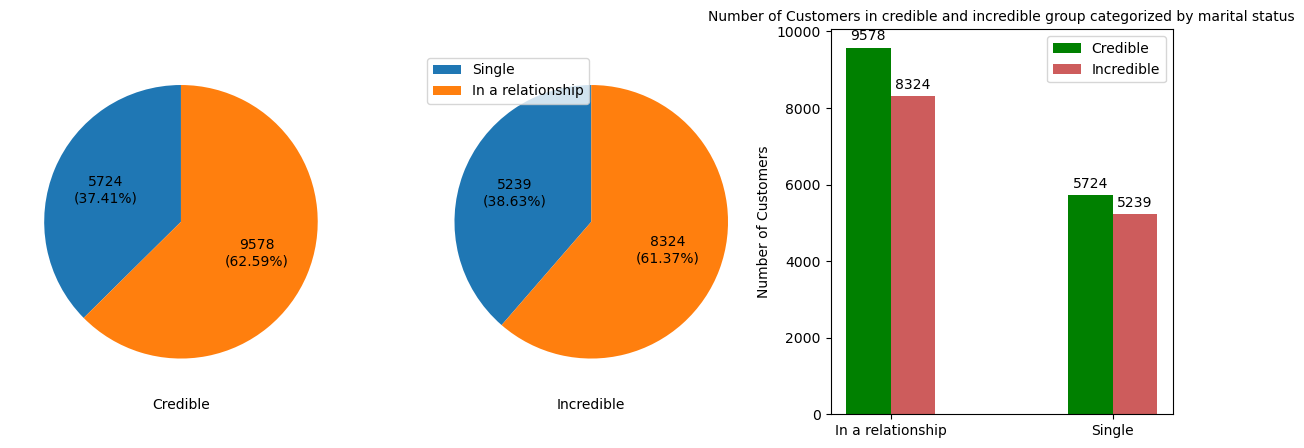

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    
values = df[df['nhomno_xhtdJuin2021'] < 2].groupby(['marital_status_recat']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['nhomno_xhtdJuin2021'] < 2].groupby(['marital_status_recat']).count()[::-1].plot(kind = 'pie', 
                                                                      y = 'nhomno_xhtdJuin2021', 
                                                                      labels = None, 
                                                                      legend = None, 
                                                                      ylabel = '',
                                                                      autopct = make_autopct(values), 
                                                                      ax = ax[0], 
                                                                      startangle = 90)
ax[0].set_xlabel('Credible')

values = df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['marital_status_recat']).count()['nhomno_xhtdJuin2021'].to_list()
df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['marital_status_recat']).count()[::-1].plot(kind = 'pie', 
                                                                    y = 'nhomno_xhtdJuin2021', 
                                                                    labels = None, 
                                                                    ylabel = '', 
                                                                    autopct = make_autopct(values),
                                                                    ax = ax[1], 
                                                                    startangle = 90)
ax[1].set_xlabel('Incredible')

x = np.arange(len(list(df["marital_status_recat"].unique())[:2]))
width = 0.2
smaller = df[df['nhomno_xhtdJuin2021'] < 2].groupby(['marital_status_recat']).count()['nhomno_xhtdJuin2021'].to_list()
larger = df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['marital_status_recat']).count()['nhomno_xhtdJuin2021'].to_list()

y_credible = smaller
y_incredible = larger

rects1 = ax[2].bar(x - width/2, y_credible, width, label = 'Credible', color = 'g')
rects2 = ax[2].bar(x + width/2, y_incredible, width, label = 'Incredible', color = 'indianred')

ax[2].set_ylabel('Number of Customers', fontsize = 10)
ax[2].set_title('Number of Customers in credible and incredible group categorized by marital status', fontsize = 10)

plt.xticks(x, list(df["marital_status_recat"].unique())[:2][::-1], fontsize = 10)
plt.yticks(fontsize = 10)
ax[2].legend(fontsize = 10)

ax[2].bar_label(rects1, padding = 3, fontsize = 10)
ax[2].bar_label(rects2, padding = 3, fontsize = 10)

plt.show()

#### Số lượng khách hàng đáng tin cậy và không đáng tin cậy theo giới tính và tình trạng hôn nhân

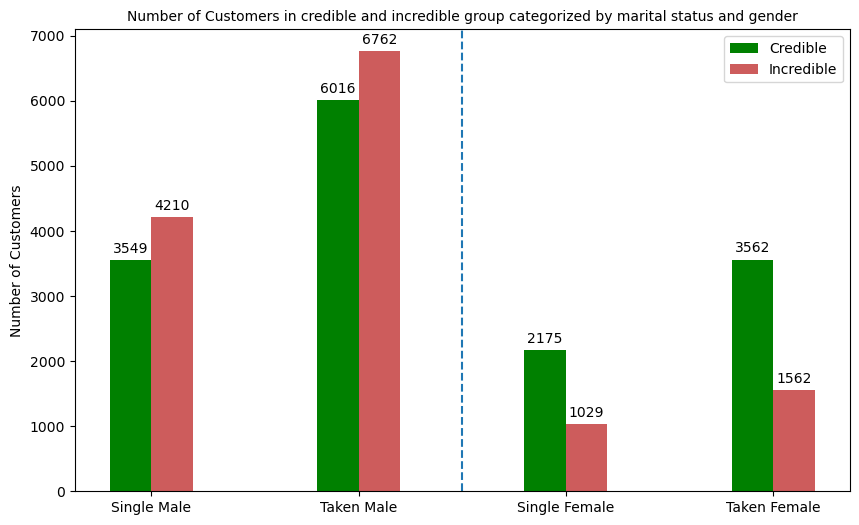

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
L = ['Single Male', 'Taken Male', 'Single Female', 'Taken Female']

x = np.arange(len(L))
width = 0.2
y_credible = df[df['nhomno_xhtdJuin2021'] < 2].groupby(['gender','marital_status_recat', 'nhomno_recat']).count()['nhomno_xhtdJuin2021'][::-1].to_list()
y_incredible = df[df['nhomno_xhtdJuin2021'] >= 2].groupby(['gender','marital_status_recat', 'nhomno_recat']).count()['nhomno_xhtdJuin2021'][::-1].to_list()

rects1 = ax.bar(x - width/2, y_credible, width, label = 'Credible', color = 'g')
rects2 = ax.bar(x + width/2, y_incredible, width, label = 'Incredible', color = 'indianred')

ax.set_ylabel('Number of Customers', fontsize = 10)
ax.set_title('Number of Customers in credible and incredible group categorized by marital status and gender', fontsize = 10)

plt.xticks(x, L, fontsize = 10)
plt.yticks(fontsize = 10)
ax.legend(fontsize = 10)

ax.bar_label(rects1, padding = 3, fontsize = 10)
ax.bar_label(rects2, padding = 3, fontsize = 10)

ax.axvline(x = 1.5, linestyle = '--')

plt.show()

- Khách hàng nam đã có người yêu/kết hôn có số lượng đáng tin cậy và không đáng tin cậy cao hơn so với khách hàng nam độc thân. Điều này có thể cho thấy những yếu tố liên quan đến trách nhiệm gia đình, ổn định cuộc sống khiến nhóm khách hàng này có xu hướng tham gia vào các hoạt động tín dụng nhiều hơn. </br>
- Tương tự, khách hàng nữ đã có người yêu/kết hôn cũng có số lượng cao hơn ở cả hai nhóm đáng tin cậy và không đáng tin cậy so với khách hàng nữ độc thân. Tuy nhiên, sự chênh lệch giữa hai nhóm này ở nữ giới có vẻ không rõ ràng bằng nam giới. </br>
- Nhóm đã có người yêu/kết hôn: Nhóm khách hàng này có tổng số lượng lớn nhất ở cả hai giới tính, cho thấy người đã có gia đình thường có nhu cầu về tín dụng cao hơn, có thể là để mua nhà, mua xe hoặc đáp ứng các nhu cầu tiêu dùng khác. </br>
- Mặc dù số lượng khách hàng độc thân ít hơn so với nhóm đã có người yêu/kết hôn, nhưng tỷ lệ khách hàng đáng tin cậy ở nhóm này cũng khá cao. Điều này cho thấy người độc thân cũng có khả năng quản lý tài chính tốt và trả nợ đúng hạn.

### 2.2. Phân tích các yếu tố giao dịch

In [21]:
df[numerical].describe()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,age
count,28865.0,2.886500e+04,2.886500e+04,28865.000000,28865.000000,28865.000000,28865.000000,2.886500e+04,2.886500e+04,28865.000000,28865.000000,28865.000000,28865.000000,28865.000000,2.886500e+04,2.886500e+04,28865.000000,28865.000000,28865.000000,28865.000000,28865.000000,28865.000000
mean,0.0,8.434248e-04,1.067644e-04,0.359342,0.483456,1.675133,7.978946,7.568790e-04,1.430613e-03,0.000010,0.832509,1.847481,2.329371,23.830054,4.658670e-04,1.306276e-03,0.000005,1.161649,4.736619,2.925273,58.597436,38.115406
std,0.0,8.207044e-04,1.053536e-04,0.450936,0.638371,0.633826,5.966909,8.958188e-04,1.609656e-03,0.000011,0.775135,2.107651,1.000099,22.540635,5.880550e-04,1.659469e-03,0.000005,1.164238,5.440090,1.269005,61.291178,7.196440
min,0.0,4.080000e-07,2.270000e-10,0.000000,0.000000,1.000000,1.000000,5.590000e-08,4.080000e-07,0.000000,0.000000,0.000000,1.000000,0.000000,1.310000e-08,2.000000e-07,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000
25%,0.0,1.975510e-04,2.270000e-05,0.000000,0.000000,1.000000,3.000000,6.470000e-05,2.040820e-04,0.000002,0.000000,0.000000,2.000000,6.000000,3.170000e-05,1.200000e-04,0.000001,0.000000,0.000000,2.000000,10.000000,32.000000
50%,0.0,8.376508e-04,1.073333e-04,0.358622,0.482628,1.669439,7.910204,3.935840e-04,8.163270e-04,0.000006,1.000000,1.000000,2.000000,18.000000,1.601500e-04,4.401610e-04,0.000003,1.000000,3.000000,3.000000,34.000000,37.000000
75%,0.0,8.376508e-04,1.073333e-04,0.358622,0.482628,2.000000,8.000000,9.195080e-04,1.755102e-03,0.000012,1.000000,3.000000,3.000000,32.000000,6.742430e-04,1.960000e-03,0.000006,2.000000,8.000000,4.000000,91.000000,43.000000
max,0.0,2.950975e-03,3.803000e-04,2.500000,2.500000,3.500000,27.000000,2.711148e-03,4.857142e-03,0.000032,2.500000,7.500000,4.500000,82.500000,1.693450e-03,4.833538e-03,0.000013,5.000000,17.500000,7.000000,207.500000,58.000000


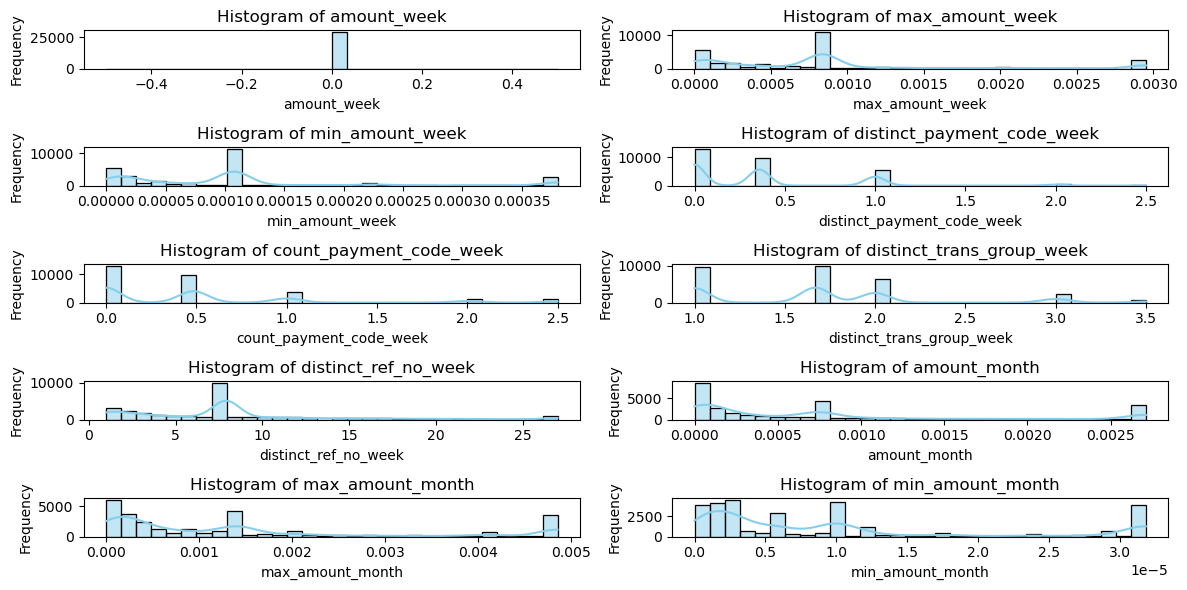

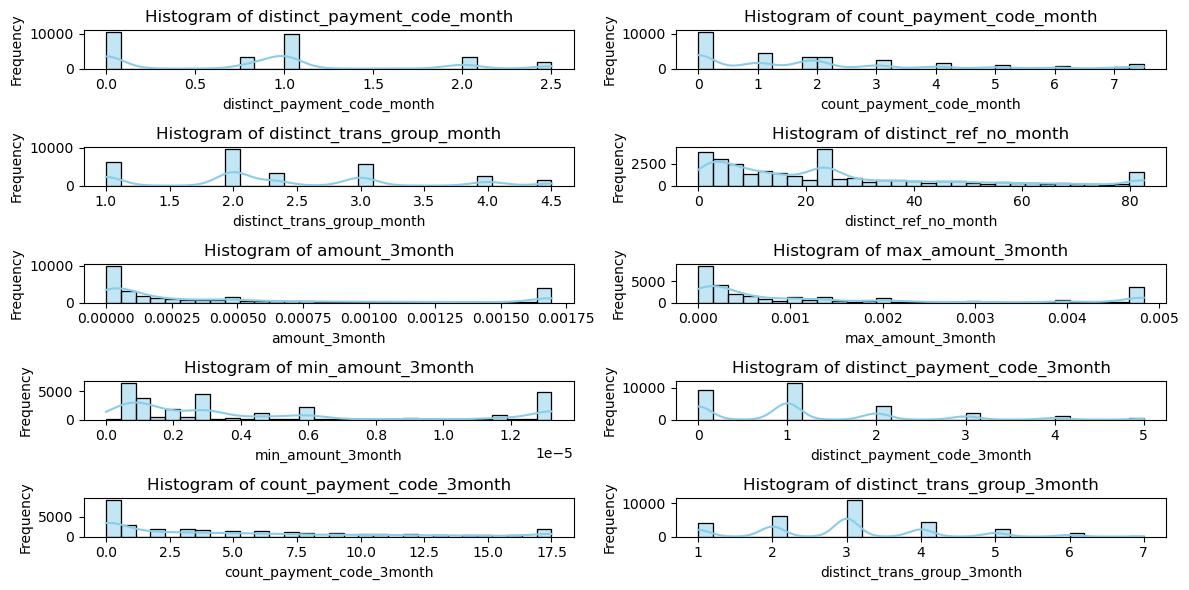

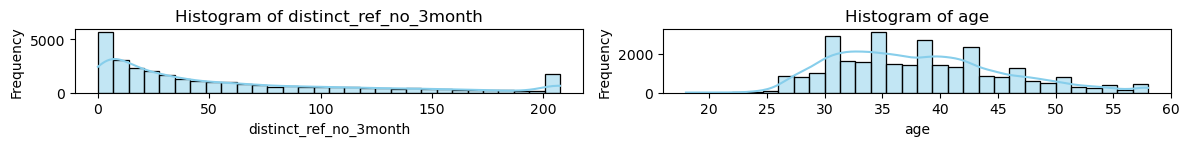

In [22]:
# Chia thành nhiều figure nếu có quá nhiều biến numerical
num_per_fig = 10  # Tối đa 10 biểu đồ trong mỗi figure

for i in range(0, len(numerical), num_per_fig):
    plt.figure(figsize=(12, 6))
    # Chọn một phần nhỏ của danh sách numerical để vẽ
    subset = numerical[i:i + num_per_fig]
    
    for j, col in enumerate(subset):
        plt.subplot(5, 2, j + 1)  # 5 hàng, 2 cột cho mỗi figure
        sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()  
    plt.show()


## 3. Model

### 3.1. Data Normalization

In [23]:
# Đưa các cột categorical về dạng nhị phân
label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
scaler = MinMaxScaler()
# Áp dụng MinMaxScaler lên các cột numerical và chuẩn hóa
df[numerical] = scaler.fit_transform(df[numerical])

In [25]:
core = df.drop(columns=['marital_status','nhomno_recat'])
# Tạo ra cột credible_group để làm biến y cho bài toán, gán giá trị 1 hoặc 0 dựa trên điều kiện từ cột 'nhomno_xhtdJuin2021'
core['credible_group'] = np.where(df["nhomno_xhtdJuin2021"].isin([0, 1]), 1, 0)
core = core.drop(['nhomno_xhtdJuin2021'], axis = 1)
core

,gender,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,age,marital_status_recat,credible_group
1,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.007025,0.028705,1.000000,0.000000,0.000000,0.000000,0.012121,0.008141,0.014131,1.000000,0.0,0.000000,0.166667,0.024096,0.500,1,1
7,1,0.0,0.161021,0.029976,0.000000,0.000000,0.000000,0.384615,0.172454,0.117573,0.093067,0.000000,0.000000,0.000000,0.581818,0.202890,0.062028,0.044815,0.2,0.114286,0.333333,0.679518,0.350,0,1
11,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.011598,0.004116,0.093067,0.400000,0.133333,0.285714,0.278788,0.016290,0.060083,0.067146,0.2,0.114286,0.333333,0.154217,0.475,0,1
12,1,0.0,0.004708,0.209045,0.000000,0.000000,0.000000,0.000000,0.003926,0.003272,0.093067,0.400000,0.400000,0.571429,0.121212,0.003966,0.005338,0.044815,0.2,0.342857,0.333333,0.096386,0.250,1,1
14,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.054320,0.227545,1.000000,0.0,0.000000,0.166667,0.014458,0.825,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99849,0,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.011625,0.041338,1.000000,0.0,0.000000,0.000000,0.009639,0.275,1,1
99850,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.020193,0.041936,1.000000,0.000000,0.000000,0.000000,0.072727,0.007610,0.020648,1.000000,0.0,0.000000,0.000000,0.028916,0.450,1,1
99853,0,0.0,0.283757,0.282233,0.000000,0.000000,0.000000,0.000000,0.004111,0.008708,0.093067,0.000000,0.000000,0.285714,0.096970,0.003819,0.009621,0.224073,0.0,0.000000,0.333333,0.057831,0.350,0,1
99864,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.271363,0.267056,0.346878,0.0,0.000000,0.000000,0.009639,0.375,1,1


In [26]:
core.isna().sum()

gender                          0
amount_week                     0
max_amount_week                 0
min_amount_week                 0
distinct_payment_code_week      0
count_payment_code_week         0
distinct_trans_group_week       0
distinct_ref_no_week            0
amount_month                    0
max_amount_month                0
min_amount_month                0
distinct_payment_code_month     0
count_payment_code_month        0
distinct_trans_group_month      0
distinct_ref_no_month           0
amount_3month                   0
max_amount_3month               0
min_amount_3month               0
distinct_payment_code_3month    0
count_payment_code_3month       0
distinct_trans_group_3month     0
distinct_ref_no_3month          0
age                             0
marital_status_recat            0
credible_group                  0
dtype: int64

In [27]:
core

,gender,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,age,marital_status_recat,credible_group
1,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.007025,0.028705,1.000000,0.000000,0.000000,0.000000,0.012121,0.008141,0.014131,1.000000,0.0,0.000000,0.166667,0.024096,0.500,1,1
7,1,0.0,0.161021,0.029976,0.000000,0.000000,0.000000,0.384615,0.172454,0.117573,0.093067,0.000000,0.000000,0.000000,0.581818,0.202890,0.062028,0.044815,0.2,0.114286,0.333333,0.679518,0.350,0,1
11,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.011598,0.004116,0.093067,0.400000,0.133333,0.285714,0.278788,0.016290,0.060083,0.067146,0.2,0.114286,0.333333,0.154217,0.475,0,1
12,1,0.0,0.004708,0.209045,0.000000,0.000000,0.000000,0.000000,0.003926,0.003272,0.093067,0.400000,0.400000,0.571429,0.121212,0.003966,0.005338,0.044815,0.2,0.342857,0.333333,0.096386,0.250,1,1
14,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.054320,0.227545,1.000000,0.0,0.000000,0.166667,0.014458,0.825,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99849,0,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.011625,0.041338,1.000000,0.0,0.000000,0.000000,0.009639,0.275,1,1
99850,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.020193,0.041936,1.000000,0.000000,0.000000,0.000000,0.072727,0.007610,0.020648,1.000000,0.0,0.000000,0.000000,0.028916,0.450,1,1
99853,0,0.0,0.283757,0.282233,0.000000,0.000000,0.000000,0.000000,0.004111,0.008708,0.093067,0.000000,0.000000,0.285714,0.096970,0.003819,0.009621,0.224073,0.0,0.000000,0.333333,0.057831,0.350,0,1
99864,1,0.0,0.283757,0.282233,0.143449,0.193051,0.267776,0.265777,0.275902,0.291791,0.309206,0.331247,0.244781,0.376226,0.284993,0.271363,0.267056,0.346878,0.0,0.000000,0.000000,0.009639,0.375,1,1


In [28]:
X = core.drop('credible_group', axis = 1)
y = core['credible_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3.2. LogisticRegression()

In [29]:
logmodel_test = LogisticRegression()
logit_hyper_values = [
    {'C': [0.01, 0.1, 10, 100, 1000, 10000, 100000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]}
]

find_logit_hyper = GridSearchCV(logmodel_test, param_grid = logit_hyper_values, cv = 4, verbose = True, n_jobs = -1)
find_best_logit_hyper = find_logit_hyper.fit(core.drop('credible_group', axis = 1), core['credible_group'])
best_logit_hyper = find_best_logit_hyper.best_estimator_

Fitting 4 folds for each of 140 candidates, totalling 560 fits


C:\Users\admin\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [30]:
logmodel_credible = LogisticRegression(C = 1000, solver = 'newton-cg', class_weight = 'balanced')
logmodel_credible.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', solver='newton-cg')

In [31]:
y_credible_lr = logmodel_credible.predict(X_test)

In [32]:
logmodel_credible.coef_

array([[-0.64940257,  0.        ,  0.80757294, -0.43169028,  0.08461062,
        -0.51941184,  0.06560329, -0.27947968, -0.28994278,  0.47368123,
         0.08966136,  0.48602791, -0.55604572,  0.67659427, -0.09873723,
        -0.17226148,  1.31241884,  0.13551339,  0.62105718,  0.38687748,
         1.87807443, -0.70887099,  0.49350279, -0.01943516]])

In [33]:
confusion_matrix(y_test, y_credible_lr)

array([[2086,  662],
       [1297, 1728]], dtype=int64)

In [34]:
print(classification_report(y_test, y_credible_lr))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2748
           1       0.72      0.57      0.64      3025

    accuracy                           0.66      5773
   macro avg       0.67      0.67      0.66      5773
weighted avg       0.67      0.66      0.66      5773



In [35]:
acc_log = logmodel_credible.score(X_test, y_test)

### 3.3. KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2, algorithm = 'auto')
knn.fit(X_train, y_train)

y_credible_knn = knn.predict(X_test)

In [37]:
confusion_matrix(y_test, y_credible_knn)

array([[2405,  343],
       [ 651, 2374]], dtype=int64)

In [38]:
print(classification_report(y_test, y_credible_knn))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2748
           1       0.87      0.78      0.83      3025

    accuracy                           0.83      5773
   macro avg       0.83      0.83      0.83      5773
weighted avg       0.83      0.83      0.83      5773



In [39]:
acc_knn = knn.score(X_test, y_test)

### 3.4. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 101)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=101)

In [41]:
y_credible_rf = rf.predict(X_test)

In [42]:
confusion_matrix(y_test, y_credible_rf)

array([[2424,  324],
       [ 430, 2595]], dtype=int64)

In [43]:
print(classification_report(y_test, y_credible_rf))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2748
           1       0.89      0.86      0.87      3025

    accuracy                           0.87      5773
   macro avg       0.87      0.87      0.87      5773
weighted avg       0.87      0.87      0.87      5773



In [44]:
acc_rf = rf.score(X_test, y_test)

### 3.5. Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_credible_dt = decision_tree.predict(X_test)

In [46]:
confusion_matrix(y_test, y_credible_dt)
print(classification_report(y_test, y_credible_dt))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2748
           1       0.89      0.78      0.83      3025

    accuracy                           0.83      5773
   macro avg       0.84      0.84      0.83      5773
weighted avg       0.84      0.83      0.83      5773



In [47]:
acc_decision_tree = decision_tree.score(X_test, y_test)

### 3.6. Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_credible_nb = gaussian.predict(X_test)

In [49]:
confusion_matrix(y_test, y_credible_nb)
print(classification_report(y_test, y_credible_nb))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67      2748
           1       0.72      0.50      0.59      3025

    accuracy                           0.63      5773
   macro avg       0.65      0.64      0.63      5773
weighted avg       0.65      0.63      0.63      5773



In [50]:
acc_gaussian = gaussian.score(X_test, y_test)

## 4. Tổng hợp kết quả, kết luận

In [51]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_rf, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.869392
4,Decision Tree,0.833882
0,KNN,0.827819
1,Logistic Regression,0.660662
3,Naive Bayes,0.634332


### Kết luận: Vậy, Random Forest là những phương pháp được lựa chọn với số điểm cao nhất.